In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

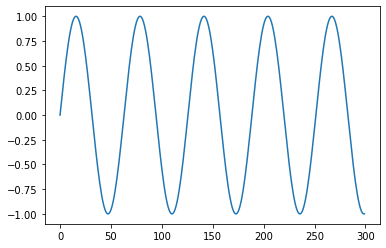

In [2]:
series = np.sin(0.1 * np.arange(300))
# series = np.arange(10)
plt.plot(series)

In [3]:
X = []
Y = []
T = 5

for i  in range(len(series) - T):
  X.append(series[i: i + T])
  Y.append(series[i+T])

X = np.array(X)
Y = np.array(Y).reshape((-1, 1))

In [4]:
split = len(X)//2
X_training = np.expand_dims(X[:split], axis=2)
Y_training = Y[:split]

X_validation = np.expand_dims(X[split:], axis=2)
Y_validation = Y[split:]

In [8]:
model = tf.keras.Sequential([
  tf.keras.layers.SimpleRNN(100, return_sequences=True, input_shape=(T,1)),
  tf.keras.layers.SimpleRNN(100),
  tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 5, 100)            10200     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 30,401
Trainable params: 30,401
Non-trainable params: 0
_________________________________________________________________


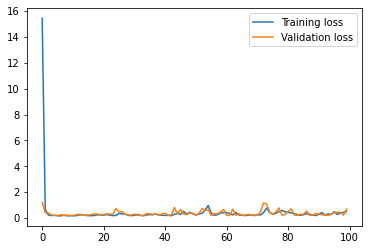

In [9]:
epochs=100
history = model.fit(X_training, Y_training,
          epochs=epochs,
          validation_data=(X_validation, Y_validation), verbose=None)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

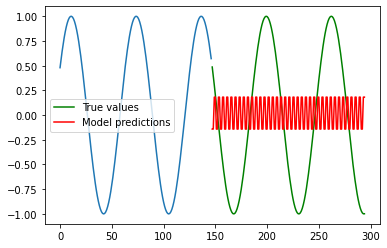

In [10]:
window = X_training[-1].squeeze()
predictions = []

for i in range(len(Y_validation)):
  p = model.predict(window.reshape(1, T, 1))[0,0]
  predictions.append(p)

  window = np.roll(window, 1)
  window[-1] = p
predictions = np.array(predictions)

plt.plot(np.arange(split), Y_training)
plt.plot(np.arange(split, len(series) - T), Y_validation.squeeze(), label="True values", color='green')
plt.plot(np.arange(split, len(series) - T), predictions, label="Model predictions", color='red')
plt.legend()
plt.show()
